## 【コロモゴロフスミルノフ検定（KS検定）】

In [1]:
%load_ext autoreload
%autoreload 2
import gc
import re
import pandas as pd
import numpy as np
import os
import sys
HOME = os.path.expanduser("~")
sys.path.append(f'{HOME}/kaggle/data_analysis/library')
import utils
from utils import get_categorical_features, get_numeric_features, reduce_mem_usage

from tqdm import tqdm
import time
import sys

os.listdir('../input/')
key = 'card_id'
target = 'target'
ignore_list = [key, target, 'merchant_id', 'first_avtive_month']

In [26]:
# import glob
# win_path = f'../season1_features/4_winner/*.gz'
# win_path = f'../features/1_first_valid//*.gz'
# #  Data Load
# base = utils.read_df_pkl('../input/base*')
# win_path_list = glob.glob(win_path)
# # tmp_path_listには検証中のfeatureを入れてある
# # tmp_path_list = glob.glob('../features/5_tmp/*.gz')
# # tmp_path_list = glob.glob('../season1_features/5_tmp/*.gz')
# tmp_path_list = []
# win_path_list += tmp_path_list

# path_list = []
# for path in win_path_list:
#     path_list.append(path)

# base_train = base[~base[target].isnull()].reset_index(drop=True)
# base_test = base[base[target].isnull()].reset_index(drop=True)
# feature_list = utils.parallel_load_data(path_list=path_list)
# df = pd.concat(feature_list, axis=1)
# train = pd.concat([base_train, df.iloc[:len(base_train), :]], axis=1)
test = pd.concat([base_test, df.iloc[len(base_train):, :].reset_index(drop=True)], axis=1)

In [33]:
from scipy.stats import ks_2samp
from joblib import Parallel, delayed
list_p_value =[]

for col in tqdm(df.columns):
    list_p_value.append(ks_2samp(test[col] , train[col])[1])

se_p = pd.Series(list_p_value, index = df.columns).sort_values() 
# list_discarded = list(se_p[se_p < .1].index)
list_discarded = list(se_p[se_p < .3].index)
list_discarded = list(set( list_discarded))
min_03 = se_p[se_p < .3]
print(min_03)
# list_p_value

# for col in min_03.index:
#     print(test[col].head())
# for col in df.columns:
#     no_null_cnt = test[col].dropna().shape[0]
#     if no_null_cnt<10:
#         print(col)

100%|██████████| 621/621 [00:20<00:00, 30.59it/s]

111_ker_month@                                                 0.000000
111_ker_weekofyear@                                            0.000000
111_ker_dayofweek@                                             0.000000
111_ker_card_id_total@                                         0.000000
190_fe1_all_new_category_2_1_0_mean@                           0.014945
111_ker_new_category_2_mean_mean@                              0.018150
190_fe1_all_auth0_amount_per_installments_sum@                 0.023533
111_ker_new_purchase_amount_mean@                              0.044939
190_fe1_all_auth0_amount_per_installments_mean@                0.055593
190_fe1_all_auth1_purchase_amount_sum@                         0.058374
190_fe1_all_auth1_amount_per_90days@                           0.058374
111_ker_hist_purchase_amount_max@                              0.058584
123_mai_all_new_main_city_ratio@                               0.060142
173_fe4_org_lag0_2_auth0_dummie_category_2_1_0_mean@           0

111_ker_month@
111_ker_weekofyear@
111_ker_dayofweek@
111_ker_card_id_total@
190_fe1_all_new_category_2_1_0_mean@


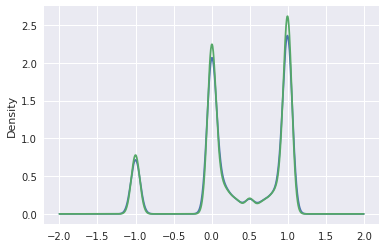

111_ker_new_category_2_mean_mean@


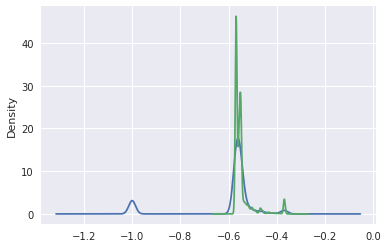

190_fe1_all_auth0_amount_per_installments_sum@


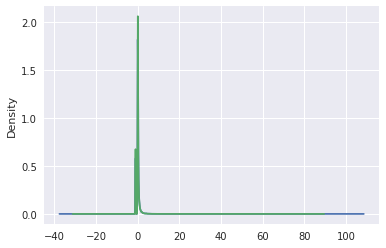

111_ker_new_purchase_amount_mean@


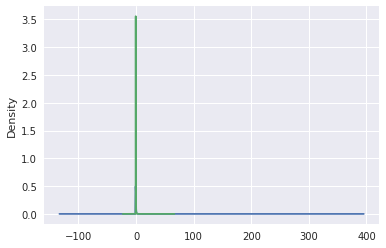

190_fe1_all_auth0_amount_per_installments_mean@


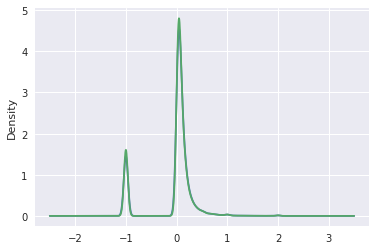

190_fe1_all_auth1_purchase_amount_sum@


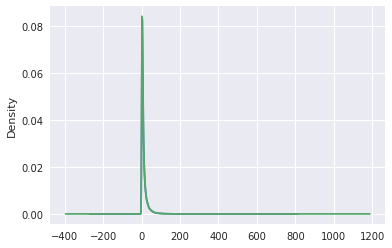

190_fe1_all_auth1_amount_per_90days@


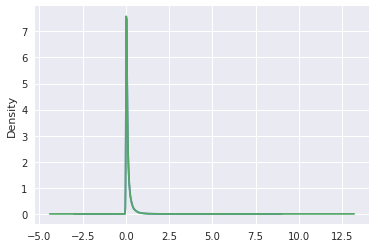

111_ker_hist_purchase_amount_max@


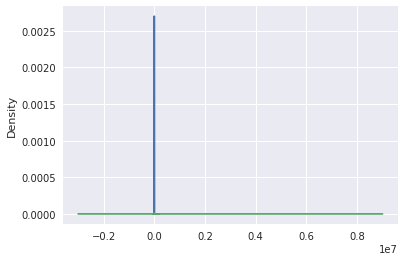

123_mai_all_new_main_city_ratio@


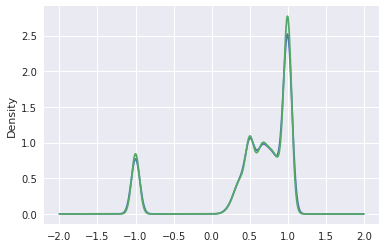

173_fe4_org_lag0_2_auth0_dummie_category_2_1_0_mean@


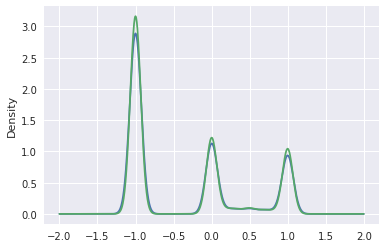

114_mer_merchant_id_M_ID_cd2c0b07e9@


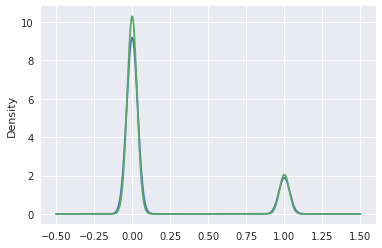

174_fe4_org_lag0_2_auth0_cat0_dummie_category_2_1_0_mean@


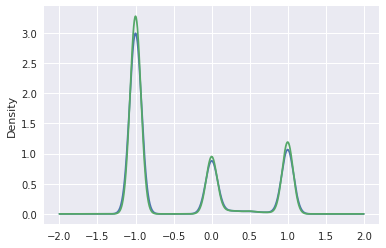

111_ker_hist_category_3_mean_mean@


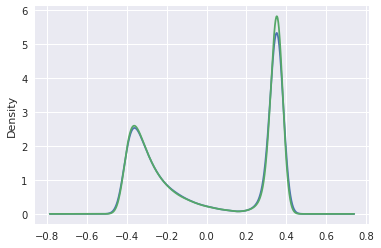

173_fe4_org_lag0_2_auth1_purchase_amount_mean@


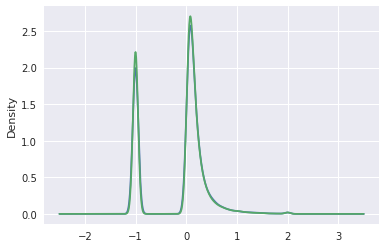

190_fe1_all_auth1_category_2_3_0_mean@


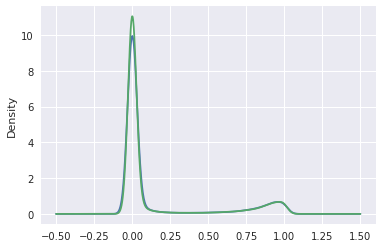

111_ker_hist_installments_mean@


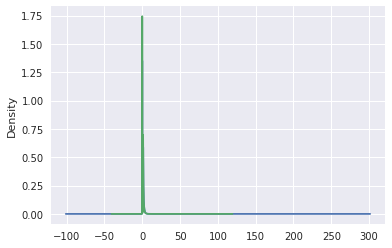

173_fe4_org_lag0_2_auth0_dummie_category_2_1_0_sum@


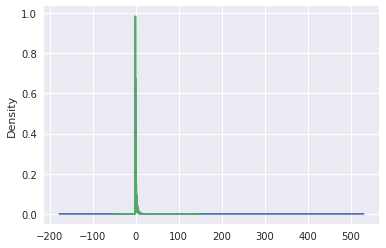

174_fe4_org_lag0_2_auth0_cat0_dummie_category_2_1_0_sum@


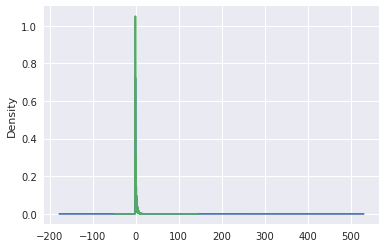

173_fe4_org_lag0_2_auth1_amount_per_installments_mean@


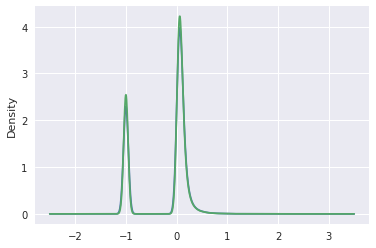

174_fe4_org_lag0_2_auth1_cat0_purchase_amount_mean@


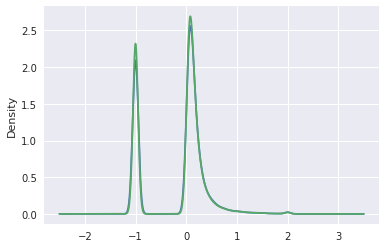

111_ker_new_month_lag_mean@


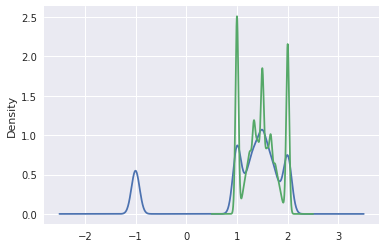

111_ker_hist_purchase_amount_mean@


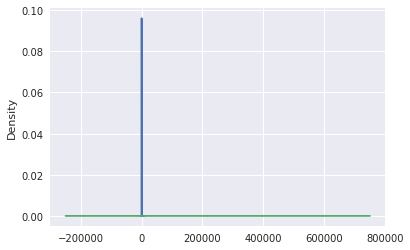

190_fe1_all_auth1_purchase_amount_min@


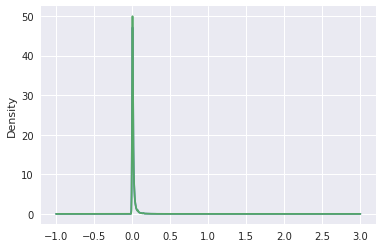

190_fe1_all_auth0_category_2_3_0_mean@


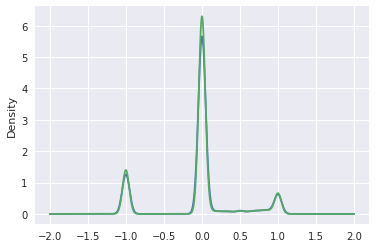

130_ddf_all_hist_last15_date_diff_mean@


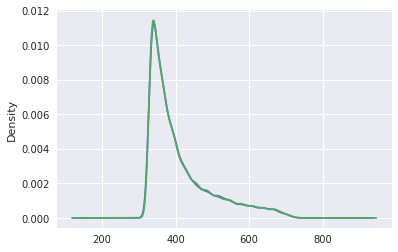

190_fe1_all_auth0_purchase_amount_max@


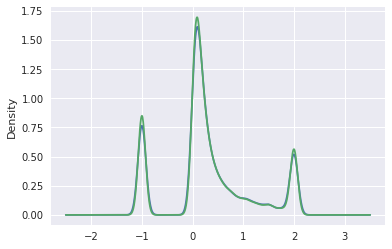

134_com_all_auth1_continuous_month_max@


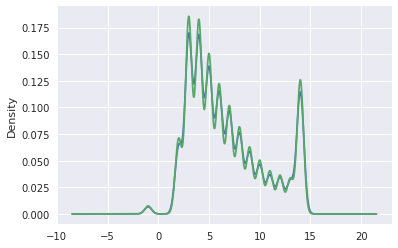

130_ddf_all_hist_last5_date_diff_mean@


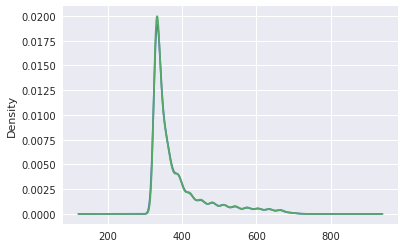

173_fe4_org_lag0_2_auth1_term@


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

for col in min_03.index:
    print(col)
    tmp = test[col].fillna(-1)
    if tmp.value_counts().shape[0]==1:
        continue
    tmp.plot(kind='kde')
    train[col].plot(kind='kde')
    plt.show()

In [13]:
import shutil
import re
import os

feature_season = 'season1_features'

list_discarded = list(set( list_discarded))
for feat in list_discarded:
    if feat.count('target'):continue
    train_path = f'{feat[:8]}train_{feat[8:]}.gz'.replace('2_1_0', '2_1.0').replace('2_3_0', '2_3.0')
    test_path = f'{feat[:8]}test_{feat[8:]}.gz'.replace('2_1_0', '2_1.0').replace('2_3_0', '2_3.0')
    if  os.path.exists(f'../{feature_season}/3_third_valid/{train_path}'):
        continue
    if  os.path.exists(f'../{feature_season}/3_third_valid/{test_path}'):
        continue
    shutil.move(f'../{feature_season}/4_winner/{train_path}', f'../{feature_season}/3_third_valid/')
    shutil.move(f'../{feature_season}/4_winner/{test_path}', f'../{feature_season}/3_third_valid/')